In [37]:
#Importing the libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import uncertainties 
from uncertainties import *

In [38]:
#Constants and values 

L = ufloat(29, 0.1) #m
S = ufloat(0.112e-3, 1e-6)**2 * np.pi/4
n = 8.5e28 
e_0 = 1.602e-19
m_e = 9.109e-31

In [39]:
#Importing the data

data = pd.read_excel('FP4_data.xlsx')

print(data)

       t     R
0   21.9  56.7
1   23.3  56.9
2   24.3  57.1
3   25.3  57.2
4   26.5  57.4
5   27.3  57.6
6   28.4  57.8
7   29.7  58.0
8   30.7  58.2
9   31.9  58.3
10  32.7  58.6
11  33.6  58.7
12  35.7  59.1
13  37.0  59.3
14  38.2  59.5
15  39.5  59.8
16  41.6  60.1
17  43.2  60.4
18  44.3  60.6
19  45.3  60.7
20  46.9  61.1
21  47.6  61.2
22  48.6  61.3
23  49.8  61.6
24  50.8  61.8
25  51.8  61.9
26  53.0  62.1
27  54.1  62.3
28  55.2  62.5
29  56.1  62.7
30  57.1  62.9
31  57.9  63.0
32  58.9  63.1
33  59.9  63.3
34  60.8  63.4
35  61.8  63.6


In [40]:
data['mu'] = L / (e_0 * n * data['R'] * S)
data['tau'] = data['mu'] * e_0 / m_e

print(data)

       t     R                 mu                tau
0   21.9  56.7  0.00381+/-0.00007  (6.71+/-0.12)e+08
1   23.3  56.9  0.00380+/-0.00007  (6.68+/-0.12)e+08
2   24.3  57.1  0.00379+/-0.00007  (6.66+/-0.12)e+08
3   25.3  57.2  0.00378+/-0.00007  (6.65+/-0.12)e+08
4   26.5  57.4  0.00377+/-0.00007  (6.62+/-0.12)e+08
5   27.3  57.6  0.00375+/-0.00007  (6.60+/-0.12)e+08
6   28.4  57.8  0.00374+/-0.00007  (6.58+/-0.12)e+08
7   29.7  58.0  0.00373+/-0.00007  (6.55+/-0.12)e+08
8   30.7  58.2  0.00371+/-0.00007  (6.53+/-0.12)e+08
9   31.9  58.3  0.00371+/-0.00007  (6.52+/-0.12)e+08
10  32.7  58.6  0.00369+/-0.00007  (6.49+/-0.12)e+08
11  33.6  58.7  0.00368+/-0.00007  (6.48+/-0.12)e+08
12  35.7  59.1  0.00366+/-0.00007  (6.43+/-0.12)e+08
13  37.0  59.3  0.00365+/-0.00007  (6.41+/-0.12)e+08
14  38.2  59.5  0.00363+/-0.00007  (6.39+/-0.12)e+08
15  39.5  59.8  0.00361+/-0.00007  (6.36+/-0.12)e+08
16  41.6  60.1  0.00360+/-0.00007  (6.33+/-0.12)e+08
17  43.2  60.4  0.00358+/-0.00007  (6.29+/-0.1

In [41]:
#Linear fit

#Calculate linear regression

slope, intercept, r_value, p_value, std_err = stats.linregress(data['t'], data['tau'].apply(lambda x: x.nominal_value))

print('slope =', slope, '+/-', std_err)

#Best fit line 
best_fit_line = slope * data['t'] + intercept

slope = -1847107.5606617834 +/- 12151.345933185787


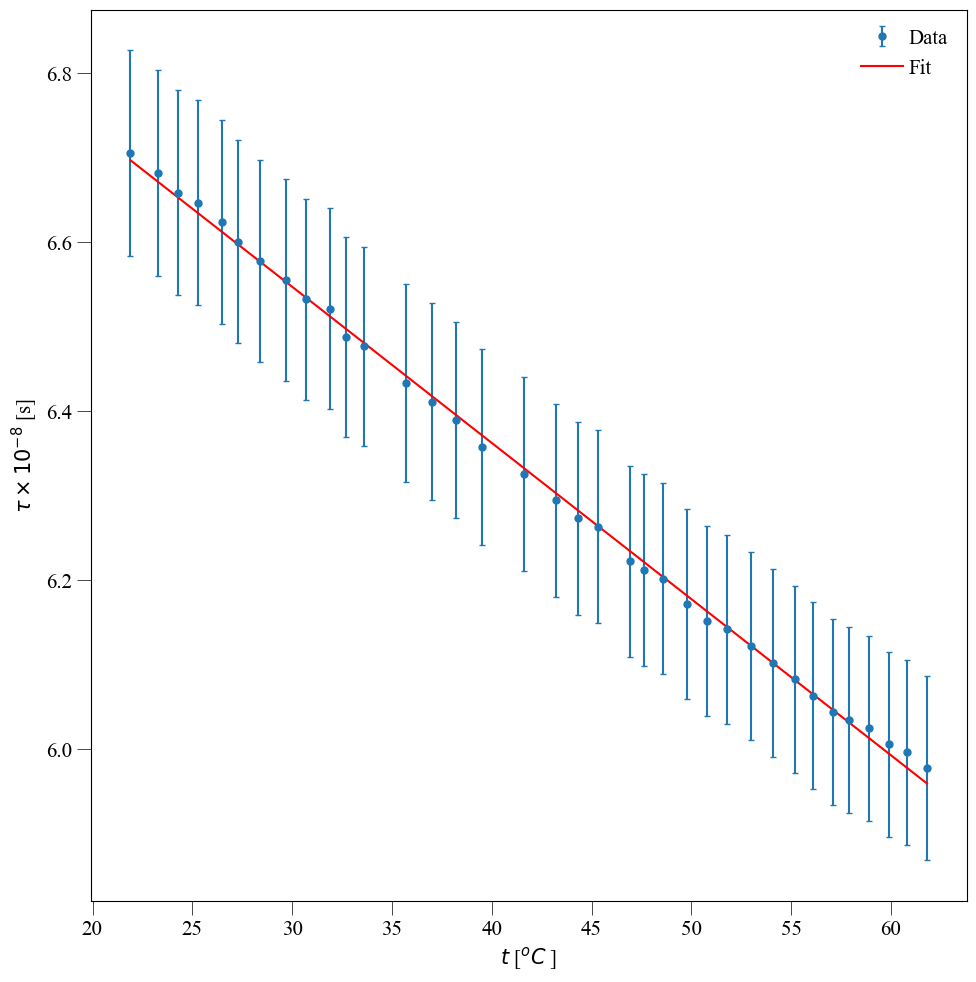

In [42]:
# Plot the data and the best-fit line

colors = ['#FF7F0E','#D62728','#FFDB58','#2CA02C','#17BECF','#1F77B4','#F0027F']  

plt.rc("font", size=10)
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(10, 10))

# ax.title.set_fontsize(20)
ax.set_xlabel(r"$t$ [$^oC$ ]")
ax.xaxis.label.set_fontsize(15)
ax.set_ylabel(r"$\tau \times 10^{-8}$ [s]")
ax.yaxis.label.set_fontsize(15)
ax.tick_params(axis="both", which="major", length=10, width=0.5, labelsize=15)
ax.tick_params(axis="both", which="minor", length=5, width=0.5, labelsize=15)
# plt.xticks(rotation=45)
plt.tight_layout()  

ax.errorbar(data['t'], data['tau'].apply(lambda x: x.nominal_value)*10**(-8), yerr=data['tau'].apply(lambda x: x.std_dev)*10**(-8), fmt='o', color=colors[5], ecolor=colors[5], markersize=5, capsize=2, label='Data')
ax.plot(data['t'], best_fit_line*10**(-8), color='r', label='Fit')

handles, labels = ax.get_legend_handles_labels()
order = [1, 0]

ax.legend([handles[i] for i in order], [labels[i] for i in order]
        ,frameon=False, loc="upper right", 
        #   bbox_to_anchor=(0.5, 1.0),
		  fontsize=15, ncol=1, handletextpad=0.3)

plt.show() 

# fig.savefig('tau.png', bbox_inches='tight')